# Hiperplokštumomis grįsti klasifikatoriai

- Klasifikacijos uždavinio tikslas yra priskirti duomenų taškus vienai iš kelių galimų kategorijų. Skirtingai nuo regresijos, klasifikacijoje siekiama prognozuoti diskrečią reikšmę – klasės žymę (angl. label, target).

- Klasifikavimo uždavinyje hipotezes įprasta vadinti *klasifikatoriais*. 

- Pradėsime nuo paprastesnių klasifikavimo uždavinių, kuomet klasių yra *dvi* (angl. binary classification).

- *k-mate hiperplokštuma* vadiname aibės $\mathbb{R}^k$ taškų poaibį $H(v, b) = \{ \textbf{x} \in \mathbb{R}^k \mid \textbf{x} \cdot v + b = 0 \}$, kur $v = (v_1, v_2, ..., v_k)^T \in \mathbb{R}^k$, $b \in \mathbb{R}$ – fiksuoti dydžiai, nusakantys hiperplokštumą. Pvz., dvimatėje erdvėje ši aibė būtų tiesė, trimatėje – plokštuma.

- Paprasčiausi klasifikatorių modeliai gaunami bandant atskirti taškus $H(v, b)$ puserdviais $H^{+}(v, b) = \{ \textbf{x} \in \mathbb{R}^k \mid \textbf{x} \cdot v + b \geq 0 \}$ ir $\mathbb{R}^k \setminus H^{+}(v, b)$, atitinkamai. Parametrų rinkinį $(v, b)$ kartais žymėsime $ w = (v, b) \in \mathbb{R}^{k+1}$.

- Klasių aibė žymėsime $\mathcal{Y} = \{-1, 1\}$. Tokiu atveju, hipotezė yra laiptinė funkcija, užrašoma:

$$
h_w(\textbf{x}) = \begin{cases} 1, \text{ kai } \textbf{x} \in H^+(w) \cr -1, \text{ kai } \textbf{x} \in \mathbb{R}^k \setminus H^+(w) = \left(H^+(w)\right)^c \end{cases}
$$

- Klasifikavimo uždavinio tikslas – nustatyti optimalius puserdvius, kurie kiek įmanoma gerai atskirtų klases.


## Atraminių vektorių klasifikatorius

- Atraminių vektorių klasifikatorius (angl. support vector machine, SVM) yra labai įdomus ir universalus MM modelis, galintis atlikti tiesinį arba netiesinį klasifikavimą (bei regresiją). SVM ypač gerai tinka sudėtingiems, bet mažiems ar vidutinio dydžio duomenų rinkiniams klasifikuoti.

- Pagrindinė SVM idėja – surasti hiperplokštumą, kuri atskirtų dvi turimas klases. Tačiau erdvėje tokių hiperplokštumų galime nubrėžti be galo daug. SVM modelis parenka optimalią hiperplokštumą siekdamas maksimizuoti paraštę tarp artimiausių skirtingų klasių taškų. Šį algoritmą galime įsivaizduoti kaip plačiausios įmanomos gatvės tarp dviejų klasių suradimą.

- Daugiau apmokymo aibės atvejų, esančių už paraštės ribų, neturės jokios įtakos hiperplokštumos parinkimui – ją visiškai nustato (angl. supports) ruožo pakraštyje esantys atvejai. Šie duomenų atvejai vadinami atraminiais vektoriais.

<hr style="border: none; height: 2px; background-color: black;">

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/support_vector_machines.png" alt="hyperplane-svm" width="65%">
<p><strong>1.6 pav., Hiperplokštumų pavyzdys dvimačiu atveju</strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">


- Atvejis, kuomet duomenis galime pilnai atskirti hiperplokštuma, vadinamas *separabiliu*. Formaliai, jis gali būti užrašytas taip:

Atvejis yra separabilus, kuomet egzistuoja hiperplokštuma $H(w), w = (v, b)$, kuria apibrėžiamas klasifikatorius $h_w$ tenkina prielaidą 
$$
\mathbb{P}(y = h_w(\textbf{x})) = 1
$$

- Galiojant šiai prielaidai visada egzistuos optimali hiperplokštuma, atskirianti dvi klases.

Hiperplokštumos paraštė taške $\textbf{x}$ vadinamas dydis $\text{dist}(\textbf{x}, H(w))$. Klasifikatoriaus $h_w$, atitinkančio mokymosi aibę $S = ((\textbf{x}^{(1)}, y^{(1)}), ..., (\textbf{x}^{(n)}, y^{(n)}))$ parašte (angl. margin) vadinamas dydis $d(w) = \min_{1\leq i \leq n} dist(\textbf{x}^{(i)}, H(w))$. Galiausiai, optimali paraštė SVM algoritmu ieškoma siekiant optimizuoti uždavinį:

$$
\max_{\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 0} d(w) = \max_{\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 0} \min_{1\leq i \leq n} dist(\textbf{x}^{(i)}, H(w)),
$$

Toks uždavinys gali būti pakeistas iškilos funkcijos minimizavimo uždaviniu, todėl jis gali būti sprendžiamas įprastais minimizavimo metodais, su garantija, jog bus rastas globalus minimumo taškas.

Prielaida, jog duomenys yra separabilūs galioja ne visada. Taigi, pastarasis optimizavimo uždavinys gali neturėti sprendinio. Siekiant apeiti šią problemą, įvedami papildomi laisvi kintamieji $\xi_i \geq 0, i = 1, ..., n$ (angl. slack variables) ir apribojimas optimizavimo uždavinyje keičiamas tokiu: 
$$
\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 1 - \xi_i
$$

Jei $\xi_i > 0$, tai atitinkamą stebinį vadiname išskirtimi. Atmetus visas išskirtis, redukuota mokymosi aibė bus separabili ir jos taškus jau galima atskirti panaudojant anksčiau paminėtą optimizavimo būdą.

`scikit-learn` tokių kintamųjų parinkimą galima valdyti naudojant $C$ hiperparametrą: mažesnė C reikšmė lemia platesnę paraštę, t.y. daugiau stebinių bus atmesti. Naudojant didelę $C$ reikšmę, klasifikatorius atmeta mažiau stebinių, bet gauna mažesnę paraštę.


<hr style="border: none; height: 2px; background-color: black;">

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/margin_svm.png" alt="margin-svm" width="65%">
<p><strong>1.7 pav., Konstantos C poveikis sprendinio paraštės dydžiui </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, clf, show_support_vectors=True):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
            linestyles=['--', '-', '--'])
    if show_support_vectors:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    plt.title(f"Linear SVM Decision Boundary with C = {clf.C:.4f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    plt.close() 


In [14]:
from sklearn.datasets import make_blobs, make_classification
from sklearn.svm import SVC
from ipywidgets import interact, FloatSlider

# X, y = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=1.0, random_state=42)

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=2.0, random_state=42)

def visualize_boundaries(C):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    plot_decision_boundary(X, y, svm)

In [18]:
from ipywidgets import interact, FloatSlider

interact(visualize_boundaries,
         C=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1))

interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.visualize_boundaries(C)>

In [17]:
a = interact(visualize_boundaries, 
         C=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Cost Hyperparameter', 
                                   style={'description_width': '150px'}, layout={'width': '600px'})
        )

interactive(children=(FloatSlider(value=1.0, description='Cost Hyperparameter', layout=Layout(width='600px'), …

- Norint parinkti geriausią hiperparametro $C$ reikšmę, galima naudoti kryžminę validaciją. Norint palyginti modelius, reikia apsibrėžti tikslumo metrikas.  

## Tikslumo metrikos klasifikacijos uždaviniams

1. **Maišos matrica (angl. confusion matrix)**:
   - Maišos matrica pateikia informaciją apie tikruosius teigiamus (TP), tikruosius neigiamus (TN), klaidingus teigiamus (FP) ir klaidingus neigiamus (FN) atvejus.
   
<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/confusion_matrix.png" alt="confusion-matrix" width="45%">
</div>

2. **Tikslumas (angl. accuracy)**:
   - Tikslumas yra teisingai klasifikuotų ir visų atvejų santykis:
     $$
     \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}
     $$
   - Tikslumas gali būti klaidinantis, kai duomenyse vyrauja dominuojanti klasė.

3. **Teigiama prognostinė vertė (angl. precision)**:
   - Teigiama prognostinė vertė yra teisingai prognozuotų teigiamų atvejų dalis tarp visų prognozuotų teigiamų atvejų.
     $$
     \text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
     $$
   - Didelis tikslumas rodo, kad yra mažai klaidingų teigiamų atvejų.

4. **Jautrumas (angl. recall)**:
   - Jautrumas yra teisingai prognozuotų teigiamų atvejų dalis tarp visų tikrųjų teigiamų atvejų.
     $$
     \text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
     $$
   - Didelis jautrumas rodo, kad dauguma teigiamų atvejų yra nustatyti.

5. **$F_1$-matas (angl. $F_1$-score)**:
   - $F_1$ yra tikslumo ir jautrumo harmoninis vidurkis.
     $$
     F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
     $$
   - Veikia ir kai klasių pasiskirstymas yra nesubalansuotas.

Best C value: 0.01
Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:

[[34  0]
 [ 1 25]]


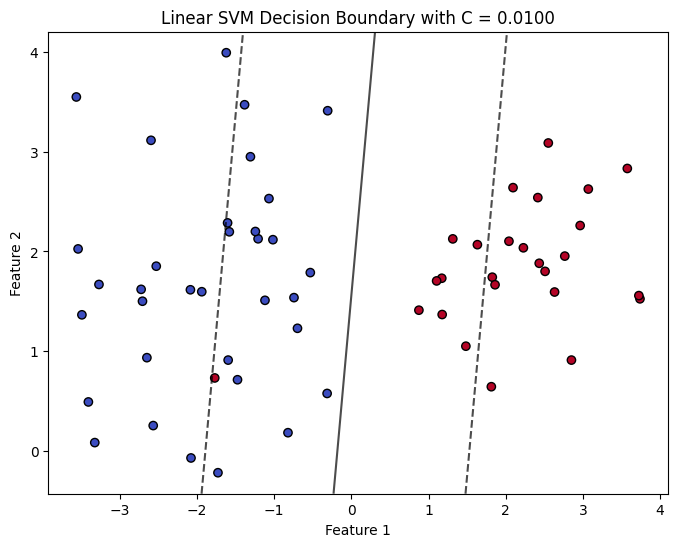

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')

param_grid = {'C': np.linspace(0.01, 10.0, 1000)}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

y_pred = grid_search.best_estimator_.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

plot_decision_boundary(X_test, y_test, clf=grid_search.best_estimator_, show_support_vectors=False)


## Branduolio triukas

## Logistinės regresijos klasifikatorius

Atsižvelgiant į binarinio klasifikavimo uždavinį, natūrali ir pati paprasčiausia netikties funkcija galėtų būti $0-1$ indikatorinė funkcija, kuri įgyja reikšmę 0, jei prognozuojama klasifikacija atitinka tikrąją klasę, arba 1, jei prognozuojama klasifikacija neatitinka tikrosios klasės. Ši netikties funkcija užrašoma kaip:

$$
\ell_{0-1}(\textbf{x}, y; w) = \begin{cases} 1, & \text{kai } y \neq h_w(\textbf{x}), \cr 0, & \text{kai } y = h_ (\textbf{x}), \end{cases} = \begin{cases} 1, & \text{kai } -y(\textbf{x} \cdot v + b) \geq 0, \cr 0, & \text{kai } -y (\textbf{x} \cdot v + b) < 0. \end{cases}
$$

Dėja, bet tokia funkcija nėra iškila ir netgi netolydi (kodėl tai problema?). Šią laiptinę funkciją gerai aproksimuoja sigmoidė:

$$
\ell_{0-1}(\textbf{x}, y; w) \approx \frac{1}{1 - e^{-y(\textbf{x} \cdot v + b)}} =: \sigma(-y(\textbf{x} \cdot v + b))
$$


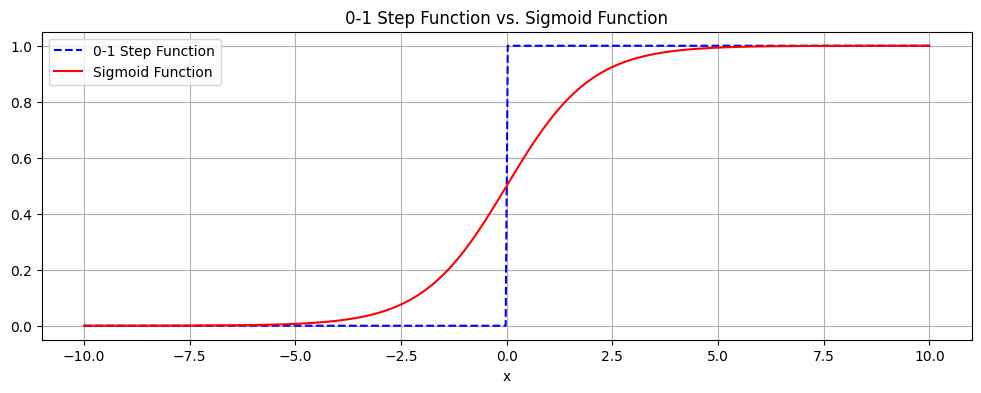

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x_seq = np.linspace(-10, 10, 400)
step_seq = step_function(x_seq)
sigmoid_seq = sigmoid_function(x_seq)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_seq, step_seq, label='0-1 Step Function', linestyle='--', color='blue')
ax.plot(x_seq, sigmoid_seq, label='Sigmoid Function', color='red')

ax.set_xlabel('x')
ax.set_title('0-1 Step Function vs. Sigmoid Function')
ax.legend()
ax.grid()
plt.show()